In [11]:
# Source: https://colab.research.google.com/drive/12YBDQFYXN8VruxKTfzDpbPsYFAEQceQP#scrollTo=4XYFwWhU8yEt
# https://keras.io/examples/vision/mnist_convnet/
import matplotlib.pyplot as plt
from IPython.display import Image

def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):        
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)
    
def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)
    
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title="label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([]);
        idx += 1
    plt.show()
    
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    print(train_history.history.keys())
    
    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])
    
    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])
        
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    
    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])
        
    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])
        
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

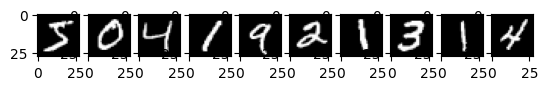

number of training images: 60000
number of test images: 10000


In [12]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# print out first 10 images in our training data
imgplot = show_images(x_train[0:10])

# check the size of our dataset
print("number of training images:",x_train.shape[0])
print("number of test images:",y_test.shape[0])

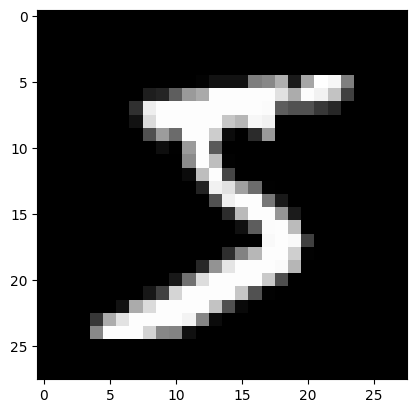

In [13]:
sample = x_train[0]

# origin image
show_image(sample)


In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
import numpy as np
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [16]:
from tensorflow.keras import layers

num_classes = 10
hidden_dim = 32
# create a Sequential model
model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        # layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# print out model structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [17]:
optimizer = 'adam' # default adam hparams
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

batch_size = 32
epochs = 10
import tensorflow as tf
# from tensorflow import Session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/10


2024-02-05 12:48:59.929425: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 12:48:59.929523: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 12:48:59.929562: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

1500/1500 [==============================] - 7s 4ms/step - loss: 0.1747 - accuracy: 0.9458 - val_loss: 0.0780 - val_accuracy: 0.9758
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0488 - val_accuracy: 0.9858
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0417 - accuracy: 0.9865 - val_loss: 0.0431 - val_accuracy: 0.9875
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0440 - val_accuracy: 0.9880
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0425 - val_accuracy: 0.9880
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0452 - val_accuracy: 0.9881
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0487 - val_accuracy: 0.9874
Epo

In [18]:
scores, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores)
print('Test accuracy:', acc)

Test loss: 0.04213538020849228
Test accuracy: 0.9898999929428101


313/313 [==============================] - 0s 424us/step


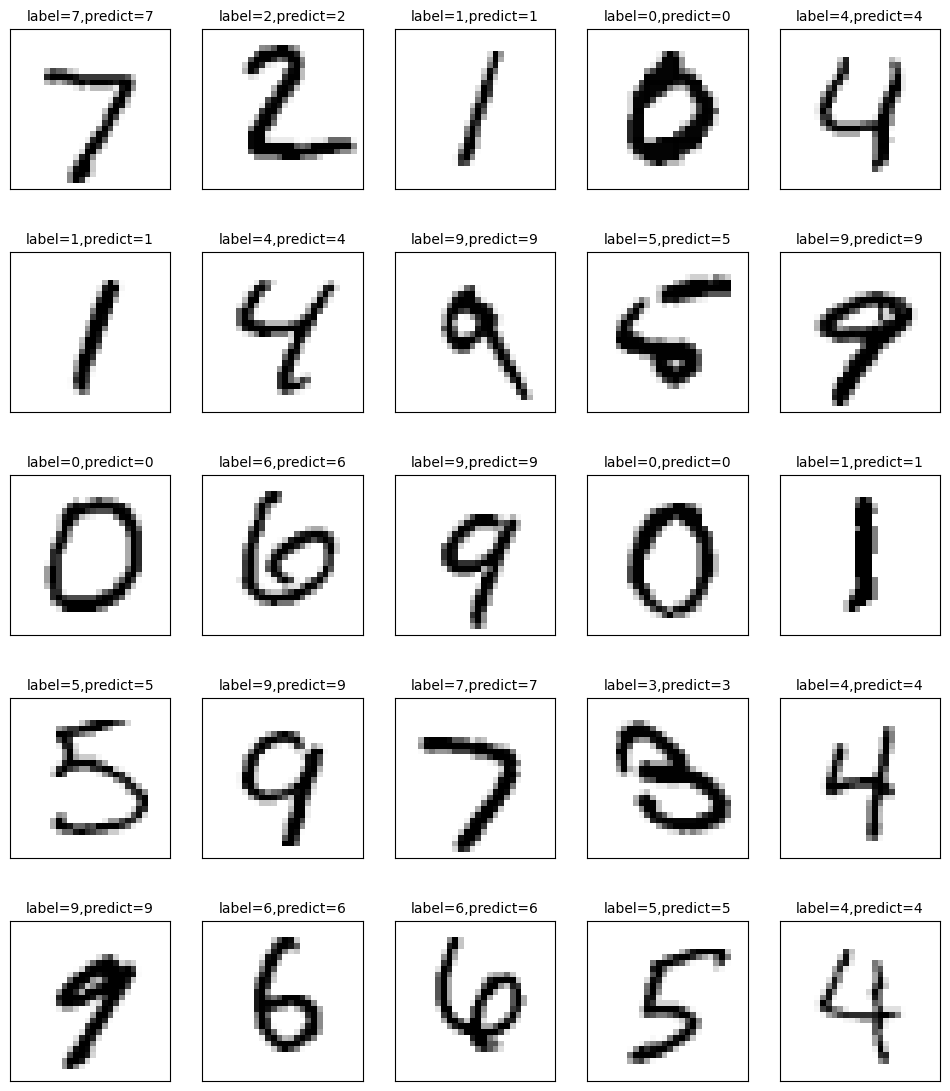

In [19]:
import numpy as np


predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

i = 0  # start from 0
j = 25 # end at 25

(_, _), (x_test_image, y_test_label) = mnist.load_data()
plot_images_labels_prediction(x_test_image,y_test_label,classes_x,i,j)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


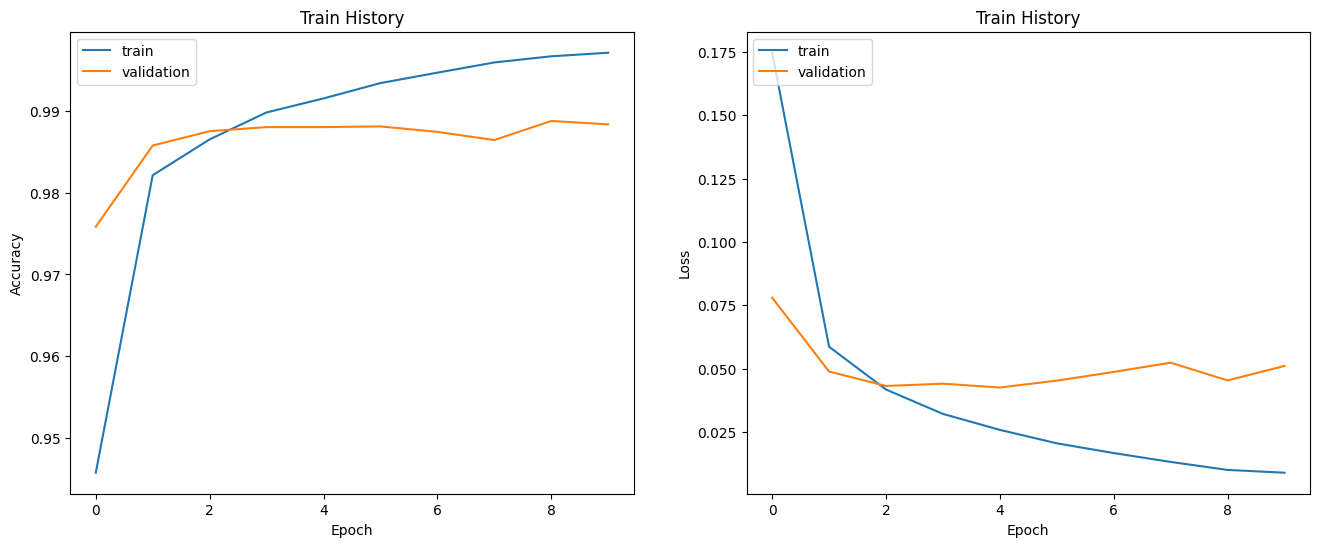

In [20]:
#show train history
show_train_history(history)

In [21]:
import pandas as pd

# create confusion matrix
pd.crosstab(y_test_label, classes_x, rownames=['label'],colnames=['predict'])


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,1,1,0,0,1,0,0,0
1,0,1130,1,1,0,1,2,0,0,0
2,0,1,1023,0,2,0,1,4,1,0
3,0,0,0,1004,0,5,0,0,1,0
4,0,0,0,0,977,0,0,0,0,5
5,1,0,1,4,0,884,2,0,0,0
6,2,2,1,0,4,7,941,0,1,0
7,0,4,4,3,0,0,0,1014,1,2
8,3,0,2,2,2,2,1,2,955,5
